In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
%cd /content/drive/Shareddrives/DL2-project/

/content/drive/Shareddrives/DL2-project


In [18]:
!ls

Archive			       ilsvrc2012_wordnet_lemmas.txt.1	simclrv2
Colabs			       ilsvrc2012_wordnet_lemmas.txt.2	ToDo.gdoc
Colabs_MS		       ilsvrc2012_wordnet_lemmas.txt.3	working_models
Datasets		       Paper_template.doc
ilsvrc2012_wordnet_lemmas.txt  Presentation.gslides


In [19]:
from google.colab import auth
auth.authenticate_user()

In [20]:
project_id = 'mnist-first-proj' # project name was initially chosen to follow a tutorial
!gcloud config set project {project_id}
!gsutil ls

Updated property [core/project].
gs://artifacts.mnist-first-proj.appspot.com/
gs://msingh-ml-storage/


In [21]:
!gsutil -m cp -r ./Datasets/plant_pathology/plant_pathology_processed/ gs://msingh-ml-storage/

Copying file://./Datasets/plant_pathology/plant_pathology_processed/test/scab/51.jpg [Content-Type=image/jpeg]...
Copying file://./Datasets/plant_pathology/plant_pathology_processed/test/scab/1690.jpg [Content-Type=image/jpeg]...
Copying file://./Datasets/plant_pathology/plant_pathology_processed/test/scab/631.jpg [Content-Type=image/jpeg]...
Copying file://./Datasets/plant_pathology/plant_pathology_processed/test/scab/1395.jpg [Content-Type=image/jpeg]...
Copying file://./Datasets/plant_pathology/plant_pathology_processed/test/scab/818.jpg [Content-Type=image/jpeg]...
Copying file://./Datasets/plant_pathology/plant_pathology_processed/test/scab/756.jpg [Content-Type=image/jpeg]...
Copying file://./Datasets/plant_pathology/plant_pathology_processed/test/scab/459.jpg [Content-Type=image/jpeg]...
Copying file://./Datasets/plant_pathology/plant_pathology_processed/test/scab/593.jpg [Content-Type=image/jpeg]...
Copying file://./Datasets/plant_pathology/plant_pathology_processed/test/scab/1

In [5]:
import tensorflow as tf

In [6]:
tf.version.VERSION

'2.3.0'

In [7]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt
import PIL

In [ ]:
from tensorflow.keras.applications.resnet50 import ResNet50

In [8]:
try:
    tpu = tf.distribute.cluster_resolver.TPUClusterResolver()
    print('Device:', tpu.master())
    tf.config.experimental_connect_to_cluster(tpu)
    tf.tpu.experimental.initialize_tpu_system(tpu)
    strategy = tf.distribute.experimental.TPUStrategy(tpu)
except:
    strategy = tf.distribute.get_strategy()
print('Number of replicas:', strategy.num_replicas_in_sync)
    
print(tf.__version__)

Device: grpc://10.87.123.130:8470
INFO:tensorflow:Initializing the TPU system: grpc://10.87.123.130:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.87.123.130:8470


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


Number of replicas: 8
2.3.0


In [10]:
AUTOTUNE = tf.data.experimental.AUTOTUNE
BATCH_SIZE = 16 * strategy.num_replicas_in_sync
IMAGE_SIZE = [256, 256]
EPOCHS = 100

# Data Loading

In [30]:
import tensorflow_hub as hub
import tensorflow_datasets as tfds

In [31]:
builder = tfds.ImageFolder('gs://msingh-ml-storage/plant_pathology_processed')

In [32]:
builder.info

tfds.core.DatasetInfo(
    name='image_folder',
    version=1.0.0,
    description='Generic image classification dataset.',
    homepage='https://www.tensorflow.org/datasets/catalog/image_folder',
    features=FeaturesDict({
        'image': Image(shape=(None, None, 3), dtype=tf.uint8),
        'image/filename': Text(shape=(), dtype=tf.string),
        'label': ClassLabel(shape=(), dtype=tf.int64, num_classes=4),
    }),
    total_num_examples=1821,
    splits={
        'test/': 354,
        'train/': 1467,
    },
    supervised_keys=('image', 'label'),
    citation="""""",
    redistribution_info=,
)

In [45]:
class_names = ["healthy", "multiple_diseases", "rust", "scab"]
#builder.class_names = class_names
NUM_CLASSES = builder.info.features['label'].num_classes

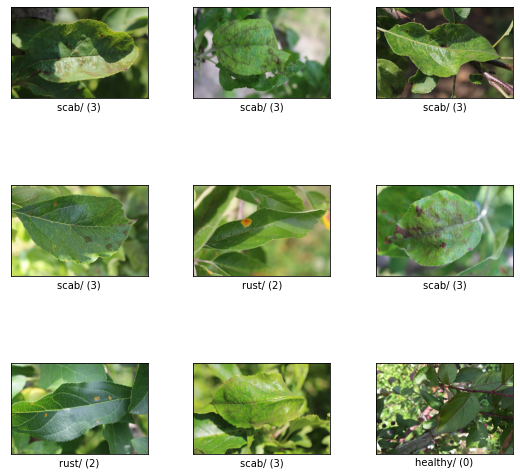

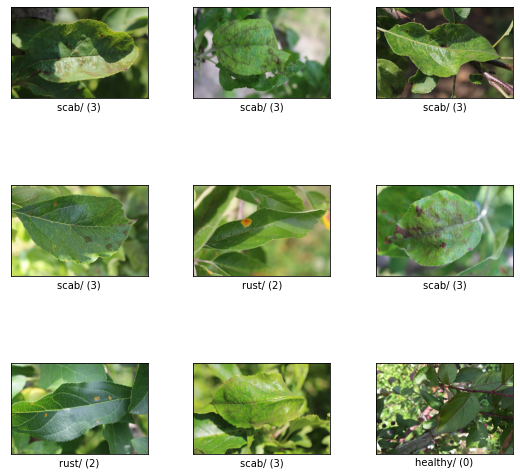

In [87]:
train_ds = builder.as_dataset(split='train/', shuffle_files=True)
tfds.show_examples(train_ds, builder.info)

In [88]:
test_ds = builder.as_dataset(split='test/', shuffle_files=True)
#tfds.show_examples(test_ds, builder.info)

# Visualization

In [89]:
# Categorical values to onehot encodings
def one_hot_and_resize(row):
    # RESIZE iamge to 256 * 256
    image = tf.image.resize(row['image'], (256, 256))
    label = tf.one_hot(row['label'], NUM_CLASSES)
    return image, label, row['image/filename']

train_ds = train_ds.map(one_hot_and_resize, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE)
test_ds = test_ds.map(one_hot_and_resize, num_parallel_calls=AUTOTUNE).batch(BATCH_SIZE)

In [90]:
# for i in train_ds.take(1):
#   print(i)

In [91]:
# for i in test_ds.take(1):
#   print(i)

In [92]:
train_ds = train_ds.cache().prefetch(buffer_size=AUTOTUNE)
test_ds = test_ds.cache().prefetch(buffer_size=AUTOTUNE)

In [96]:
# train_itr = train_ds.as_numpy_iterator()
# test_itr = test_ds.as_numpy_iterator() #iter(test_ds)
train_itr = next(iter(train_ds))
test_itr = next(iter(test_ds))

# Model Definition
Resnet-50 : https://www.tensorflow.org/api_docs/python/tf/keras/applications/ResNet50





In [107]:
model = ResNet50(weights='imagenet', include_top=False, classes=4, input_shape=(256,256,3))
METRICS = [tf.keras.metrics.AUC(name='auc')]

feature_batch = model(train_itr)
print(feature_batch.shape)

model.trainable = False

(128, 8, 8, 2048)


In [ ]:
global_average_layer = tf.keras.layers.GlobalAveragePooling2D()
feature_batch_average = global_average_layer(feature_batch)

prediction_layer = tf.keras.layers.Dense(1)
prediction_batch = prediction_layer(feature_batch_average)
print(model.summary())

# TODO CREATE INTERMEDIARY LAYERS THAT PRE PROCESS THE IMAGE

model.compile(
    optimizer='adam',
    loss=tf.losses.CategoricalCrossentropy(),
    metrics=METRICS

In [99]:
def exponential_decay(lr0, s):
    def exponential_decay_fn(epoch):
        return lr0 * 0.1 **(epoch / s)
    return exponential_decay_fn

exponential_decay_fn = exponential_decay(0.01, 20)

lr_scheduler = tf.keras.callbacks.LearningRateScheduler(exponential_decay_fn)

checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("alzheimer_model.h5", save_best_only=True)

early_stopping_cb = tf.keras.callbacks.EarlyStopping(patience=10, restore_best_weights=True)

**todo:** Fix resnet model initilization causing issue with this trianing loop

In [ ]:
history = model.fit(
    train_itr,
    validation_data=test_itr,
    callbacks=[checkpoint_cb, early_stopping_cb, lr_scheduler], # Add tensorboard
    epochs=EPOCHS
)

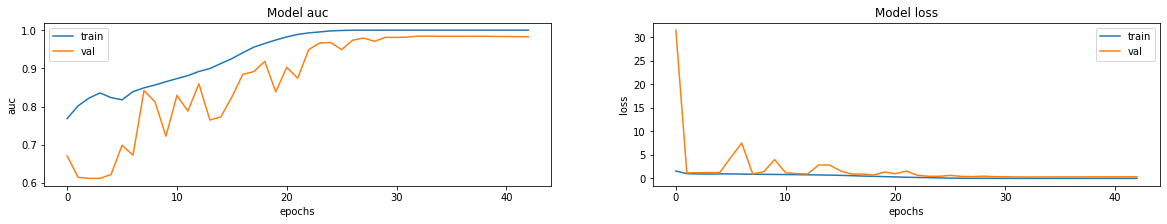

In [ ]:
fig, ax = plt.subplots(1, 2, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['auc', 'loss']):
    ax[i].plot(history.history[met])
    ax[i].plot(history.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'val'])